# Cleaning sentiment dataset and converting timestamp to daily level


In [4]:
import pandas as pd

sentiment = pd.read_csv("data/fear_greed_index.csv")

sentiment["date"] = pd.to_datetime(sentiment["date"])
sentiment["Date"] = sentiment["date"].dt.date

sentiment = sentiment[["Date","classification","value"]]
sentiment.head()



,Date,classification,value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11


## 2. Data Cleaning & Preparation


In [6]:
trader = pd.read_csv("data/historical_data.csv")

trader["Timestamp IST"] = pd.to_datetime(
    trader["Timestamp IST"],
    dayfirst=True,
    errors="coerce"
)

trader["Date"] = trader["Timestamp IST"].dt.date

trader.head()



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [8]:
sentiment.isnull().sum()



Date              0
classification    0
value             0
dtype: int64

In [9]:
trader.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
dtype: int64

In [10]:
sentiment.drop_duplicates(inplace=True)
trader.drop_duplicates(inplace=True)


In [11]:
trader.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
dtype: int64

In [12]:
sentiment.isnull().sum()

Date              0
classification    0
value             0
dtype: int64

## Daily PnL


In [81]:
daily_pnl = trader.groupby(["Date","Account"])["Closed PnL"].sum().reset_index()


In [82]:
daily_pnl

,Date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
...,...,...,...
2336,2025-05-01,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,1449.529436
2337,2025-05-01,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,102460.171640
2338,2025-05-01,0xbaaaf6571ab7d571043ff1e313a9609a10637864,1.860320
2339,2025-05-01,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,-113601.020138


## Trades per day

In [84]:
trades_per_day = trader.groupby("Date").size().reset_index(name="trade_count")


In [85]:
trades_per_day

,Date,trade_count
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3
...,...,...
475,2025-04-27,337
476,2025-04-28,1379
477,2025-04-29,2243
478,2025-04-30,1113


In [86]:
# merge metrics
behavior = daily_pnl.merge(trades_per_day,on="Date")\
                    .merge(avg_trade_size,on="Date")\
                    .merge(sentiment,on="Date")

summary_behavior = behavior.groupby("classification").agg({
    "Closed PnL":"mean",
    "trade_count":"mean",
    "Size USD":"mean"
})

summary_behavior


,Closed PnL,trade_count,Size USD
classification,,,
Extreme Fear,4619.439053,2106.850000,5208.084485
Extreme Greed,5161.922644,744.517110,3679.784666
Fear,5328.818161,1318.130159,7743.219963
Greed,3318.100730,809.317901,5537.023257
Neutral,3438.618818,1235.867021,5274.791403


## Average trade size

In [88]:
# Average fee per day (behavior indicator)

avg_fee = (
    trader
    .groupby("Date")["Fee"]
    .mean()
    .reset_index()
    .rename(columns={"Fee": "avg_fee"})
)

avg_fee.head()



,Date,avg_fee
0,2023-05-01,0.000000
1,2023-12-05,1.389051
2,2023-12-14,2.572803
3,2023-12-15,1.326245
4,2023-12-16,1.279063


## Buy vs Sell ratio


## Trader Behavioral Analysis


In [90]:
long_short= trader.groupby(["Date","Side"]).size().unstack(fill_value=0)


In [91]:
long_short

Side,BUY,SELL
Date,,
2023-05-01,3,0
2023-12-05,7,2
2023-12-14,5,6
2023-12-15,2,0
2023-12-16,3,0
...,...,...
2025-04-27,209,128
2025-04-28,652,727
2025-04-29,1105,1138


## Average fee (behavior indicator)

In [92]:
avg_fee = trader.groupby("Date")["Fee"].mean().reset_index()


In [93]:
avg_fee

,Date,Fee
0,2023-05-01,0.000000
1,2023-12-05,1.389051
2,2023-12-14,2.572803
3,2023-12-15,1.326245
4,2023-12-16,1.279063
...,...,...
475,2025-04-27,0.165955
476,2025-04-28,4.356237
477,2025-04-29,2.295718
478,2025-04-30,2.650659


## Merge with Sentiment

In [94]:
merged = daily_pnl.merge(sentiment,on="Date",how="inner")
merged.head()


,Date,Account,Closed PnL,classification,value
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,Greed,63
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,Extreme Greed,75
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737,Greed,72
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034,Greed,70
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,Greed,67


## Distribution of PnL

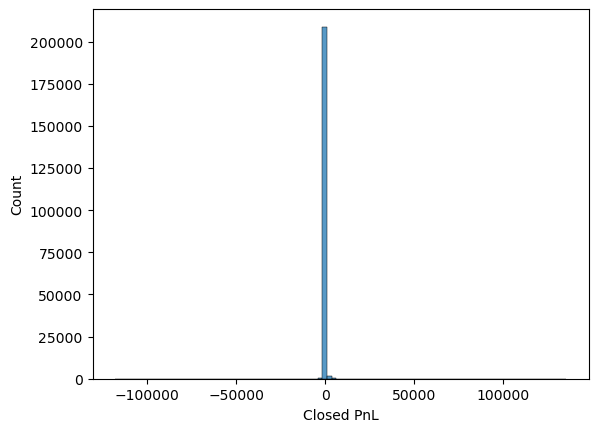

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(trader["Closed PnL"],bins=100)
plt.show()


## Fear vs Greed Performance

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Greed'),
  Text(1, 0, 'Extreme Greed'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Fear'),
  Text(4, 0, 'Extreme Fear')])

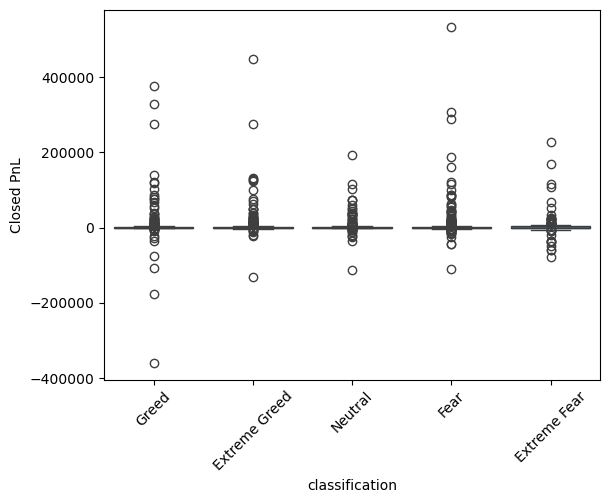

In [96]:
sns.boxplot(x="classification",y="Closed PnL",data=merged)
plt.xticks(rotation=45)


## Trade Frequency vs Sentiment

<Axes: xlabel='classification', ylabel='trade_count'>

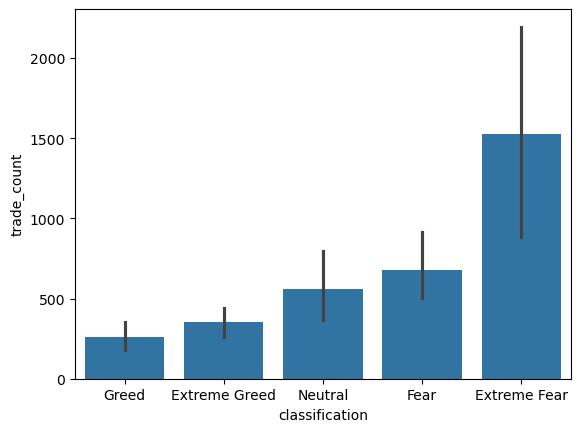

In [97]:
merged_trades = trades_per_day.merge(sentiment,on="Date")

sns.barplot(x="classification",y="trade_count",data=merged_trades)


## Trade Size vs Sentiment

<Axes: xlabel='classification', ylabel='Size USD'>

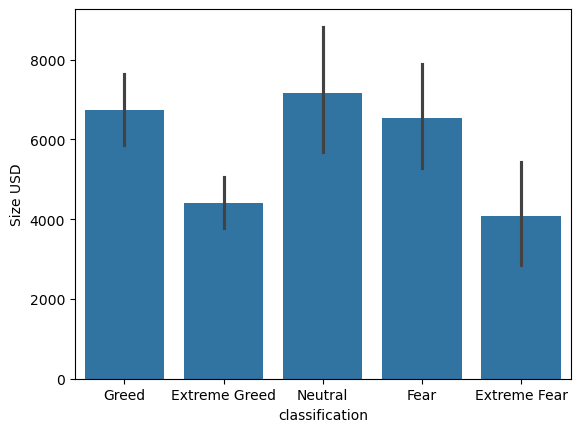

In [98]:
merged_size = avg_trade_size.merge(sentiment,on="Date")

sns.barplot(x="classification",y="Size USD",data=merged_size)


## Buy vs Sell Behavior

<Axes: xlabel='Date'>

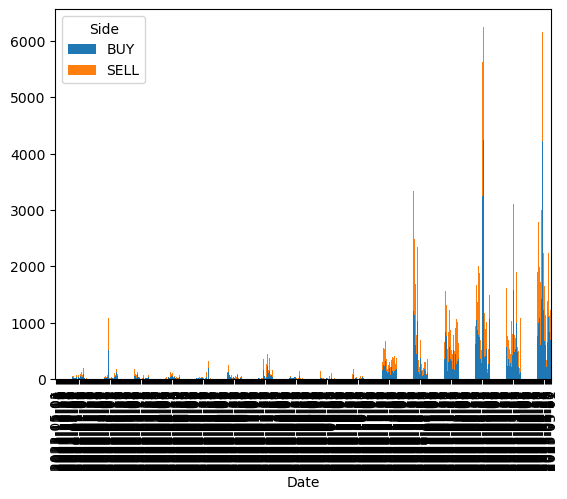

In [99]:
long_short.plot(kind="bar",stacked=True)


## Trader Segmentation

## High vs Low PnL traders

In [100]:
trader_profit = trader.groupby("Account")["Closed PnL"].sum()

threshold = trader_profit.median()

high_profit = trader_profit[trader_profit > threshold]
low_profit = trader_profit[trader_profit <= threshold]


## Frequent vs Infrequent traders

In [101]:
trade_counts = trader.groupby("Account").size()
threshold = trade_counts.median()

frequent_traders = trade_counts[trade_counts > threshold].index
trader["trader_type"] = trader["Account"].isin(frequent_traders)

trader["trader_type"] = trader["trader_type"].map({True:"Frequent",False:"Infrequent"})

trader.groupby("trader_type")["Closed PnL"].mean()



trader_type
Frequent      42.493421
Infrequent    96.943024
Name: Closed PnL, dtype: float64

In [102]:
trade_count

Account
0x083384f897ee0f19899168e3b1bec365f52a9012     3818
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     7280
0x271b280974205ca63b716753467d5a371de622ab     3809
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    13311
0x2c229d22b100a7beb69122eed721cee9b24011dd     3239
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891      815
0x39cef799f8b69da1995852eea189df24eb5cae3c     3589
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6      332
0x420ab45e0bd8863569a5efbb9c05d91f40624641      383
0x430f09841d65beb3f27765503d0f850b8bce7713     1237
0x47add9a56df66b524d5e2c1993a43cde53b6ed85     8519
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4     4356
0x4f93fead39b70a1824f981a54d4e55b278e9f760     7584
0x513b8629fe877bb581bf244e326a047b249c4ff1    12236
0x6d6a4b953f202f8df5bed40692e7fd865318264a      975
0x72743ae2822edd658c0c50608fd7c5c501b2afbd     1590
0x72c6a4624e1dffa724e6d00d64ceae698af892a0     1430
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4     9893
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f     1559
0x81

In [104]:
freq_threshold 

3699.0

In [105]:
frequent 

Account
0x083384f897ee0f19899168e3b1bec365f52a9012     3818
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     7280
0x271b280974205ca63b716753467d5a371de622ab     3809
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    13311
0x47add9a56df66b524d5e2c1993a43cde53b6ed85     8519
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4     4356
0x4f93fead39b70a1824f981a54d4e55b278e9f760     7584
0x513b8629fe877bb581bf244e326a047b249c4ff1    12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4     9893
0x8170715b3b381dffb7062c0298972d4727a0a63b     4601
0x8477e447846c758f5a675856001ea72298fd9cb5    14998
0xa0feb3725a9335f49874d7cd8eaad6be45b27416    15605
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    14733
0xb899e522b5715391ae1d4f137653e7906c5e2115     4838
0xbaaaf6571ab7d571043ff1e313a9609a10637864    21192
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    40184
dtype: int64

## Big vs Small traders

In [107]:
size_per_trader = trader.groupby("Account")["Size USD"].mean()
threshold = size_per_trader.median()

large_traders = size_per_trader[size_per_trader > threshold].index
trader["size_type"] = trader["Account"].isin(large_traders)

trader["size_type"] = trader["size_type"].map({True:"Large",False:"Small"})

trader.groupby("size_type")["Closed PnL"].mean()



size_type
Large    99.587777
Small    25.149651
Name: Closed PnL, dtype: float64

In [108]:
size_per_trader


Account
0x083384f897ee0f19899168e3b1bec365f52a9012    16159.576734
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     1653.226327
0x271b280974205ca63b716753467d5a371de622ab     8893.000898
0x28736f43f1e871e6aa8b1148d38d4994275d72c4      507.626933
0x2c229d22b100a7beb69122eed721cee9b24011dd     3138.894782
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891     1729.941104
0x39cef799f8b69da1995852eea189df24eb5cae3c     4790.575486
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6     3445.471265
0x420ab45e0bd8863569a5efbb9c05d91f40624641     5189.367128
0x430f09841d65beb3f27765503d0f850b8bce7713     2397.824753
0x47add9a56df66b524d5e2c1993a43cde53b6ed85      517.528924
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4     9084.699093
0x4f93fead39b70a1824f981a54d4e55b278e9f760    17098.171055
0x513b8629fe877bb581bf244e326a047b249c4ff1    34396.580284
0x6d6a4b953f202f8df5bed40692e7fd865318264a      746.725651
0x72743ae2822edd658c0c50608fd7c5c501b2afbd     7216.667245
0x72c6a4624e1dffa724e6d00d64ceae698af892a0     2

In [109]:
from scipy.stats import ttest_ind

fear = merged[merged["classification"].str.contains("Fear")]["Closed PnL"]
greed = merged[merged["classification"].str.contains("Greed")]["Closed PnL"]

ttest_ind(fear,greed)



TtestResult(statistic=np.float64(0.7524943436241505), pvalue=np.float64(0.4518440997155718), df=np.float64(1962.0))

In [110]:
print("Fear Mean:", fear.mean())
print("Greed Mean:", greed.mean())
print("Difference:", greed.mean() - fear.mean())


Fear Mean: 5185.146443205064
Greed Mean: 4144.208333580919
Difference: -1040.938109624145


In [111]:
import numpy as np

def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    pooled_std = np.sqrt(((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx+ny-2))
    return (x.mean() - y.mean()) / pooled_std

print("Cohen's d:", cohens_d(fear, greed))


Cohen's d: 0.0346279185548793


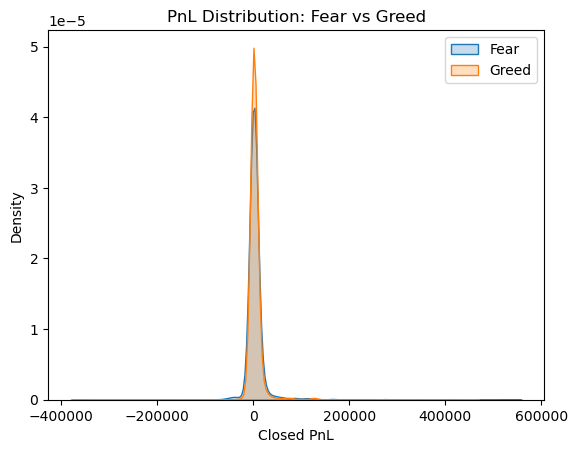

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(fear, label="Fear", fill=True)
sns.kdeplot(greed, label="Greed", fill=True)
plt.legend()
plt.title("PnL Distribution: Fear vs Greed")
plt.show()


In [113]:
fear.std(), greed.std()


(31224.14876437554, 29252.037676705393)

In [114]:
fear.min(), greed.min()


(-108604.496278, -358963.139984)

In [115]:
from scipy.stats import mannwhitneyu
mannwhitneyu(fear, greed)


MannwhitneyuResult(statistic=np.float64(440966.0), pvalue=np.float64(0.061826269243103936))

In [116]:
volatility = trader.groupby("Account")["Closed PnL"].std()
threshold = volatility.median()

consistent = volatility[volatility < threshold].index
trader["consistency"] = trader["Account"].isin(consistent)

trader["consistency"] = trader["consistency"].map({True:"Consistent",False:"Volatile"})




In [117]:
risk_analysis = merged.groupby("classification").agg({
    "Closed PnL":["min","std","mean"]
})

risk_analysis


Closed PnL                           
                          min           std         mean
classification                                          
Extreme Fear    -77308.420095  29534.839183  4619.439053
Extreme Greed  -132271.000000  27496.863832  5161.922644
Fear           -108604.496278  31659.771538  5328.818161
Greed          -358963.139984  30599.040173  3318.100730
Neutral        -113601.020138  17447.863645  3438.618818